# iLykei Lecture Series

# Machine Learning

# Introduction to Deep Learning

# Tuning Nets with Keras

## Yuri Balasanov, Leonid Nazarov, &copy; iLykei 2017-2018


This notebook shows how to tune basic network parameters: number of epochs, dropout rate, learning rate, number of neurons in the layers, optimization algorithm.

Import all necessary modules.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical, plot_model
from keras.optimizers import Adam,SGD,Adagrad
from keras.utils.vis_utils import model_to_dot
from keras.wrappers.scikit_learn import KerasClassifier
from keras.initializers import glorot_uniform
from IPython.display import SVG


Using TensorFlow backend.


# Data (Kaggle OTTO  Group challenge)

Tuning methods will be demonstrated on the train dataset from Kaggle [Otto Group Product Classification Challenge](https://www.kaggle.com/c/otto-group-product-classification-challenge).  
Read the data, remove 'id' column and shuffle rows since they are originally oredered by class. 

In [15]:
X = pd.read_csv("KaggleOtto_train.csv")
X.drop('id', axis=1, inplace=True)
print(X.shape)
np.random.seed(1)
# Shuffle data. It is originally oredered by class
X = X.reindex(np.random.permutation(X.index))

(55878, 94)


This is a multiclass classification problem. 

Keras loss function for this problem is *'categorical_crossentropy'* (multiclass logloss). 

There is important note in the manual:  <br>
when using the *'categorical_crossentropy'* loss, your targets should be in categorical format (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except for 1 at the index corresponding to the class of the sample). 

In order to convert integer targets into categorical targets, you can use Keras utility *'to_categorical'*:

`from keras.utils import to_categorical`
`categorical_labels = to_categorical(int_labels, num_classes=None)`

The target variable initially is in string format:

In [5]:
X.target[:6]

34888    Class_8
33063    Class_1
18402    Class_5
48904    Class_9
8078     Class_3
24224    Class_6
Name: target, dtype: object

Convert strings to integers and then to categorical format

In [16]:
# Extract target
# Encode it to make it manageable by ML algo, convert to np.int32
y = X.target.values
encoder = LabelEncoder()
y = encoder.fit_transform(y).astype(np.int32)
num_classes = len(encoder.classes_)
# convert class vectors to binary class matrices
y = to_categorical(y, num_classes)

# Remove target from train
X.drop('target', axis=1, inplace=True)

y[:6,:]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

It was noticed during competition that logarithmic transfrom improves performance of most of ML algrithms. Transform the data and convert them to numpy array.

In [17]:
num_features = X.shape[1]
# log transform to decrease large values affect
X = np.log(1+X.values)

# The baseline model

Start tunning sequential network with two hidden layers and dropout layers after each of them. 

The following function creates such network.





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




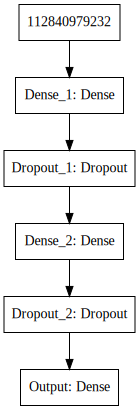

In [18]:
SEED = 2
def getModel(dropout=0.1, neurons1=500, neurons2=250,
             learningRate=0.04):
    np.random.seed(1)
    model = Sequential()
    model.add(Dense(neurons1, activation='relu', input_dim=num_features, 
                    kernel_initializer=glorot_uniform(seed=SEED),
                    name='Dense_1'))
    model.add(Dropout(dropout,name='Dropout_1'))
    model.add(Dense(neurons2, activation='relu',
                    kernel_initializer=glorot_uniform(seed=SEED),
                    name='Dense_2'))
    model.add(Dropout(dropout,name='Dropout_2'))
    model.add(Dense(num_classes, activation='softmax',
                    kernel_initializer=glorot_uniform(seed=SEED),
                    name='Output'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adagrad(lr=learningRate), metrics=['accuracy'])
    return model

model1 = getModel()

SVG(model_to_dot(model1).create(prog='dot', format='svg'))

The network was created by 'getModel()' with default parameters. Method `Fit` has parameter  

`validation_split`: float (0. < x < 1): this is fraction of the data to use as hold-out validation data.  

Set `validation_split = 0.2` i.e. 20% of data will be used for validation. <br>
Fit the model and draw validation loss plot. <br>
Since we want to show validation loss behaviour after it reaches minimum, we do not use `EarlyStopping` callback.

In [19]:
net1 = model1.fit(X, y, epochs=12, batch_size=512, verbose=2,
                  validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 44702 samples, validate on 11176 samples
Epoch 1/12





 - 8s - loss: 1.2898 - acc: 0.7008 - val_loss: 0.5984 - val_acc: 0.7669
Epoch 2/12
 - 5s - loss: 0.5544 - acc: 0.7860 - val_loss: 0.5474 - val_acc: 0.7868
Epoch 3/12
 - 5s - loss: 0.5063 - acc: 0.8025 - val_loss: 0.5372 - val_acc: 0.7891
Epoch 4/12
 - 5s - loss: 0.4723 - acc: 0.8127 - val_loss: 0.5502 - val_acc: 0.7798
Epoch 5/12
 - 5s - loss: 0.4446 - acc: 0.8221 - val_loss: 0.5187 - val_acc: 0.8006
Epoch 6/12
 - 6s - loss: 0.4202 - acc: 0.8327 - val_loss: 0.5232 - val_acc: 0.8007
Epoch 7/12
 - 5s - loss: 0.3971 - acc: 0.8417 - val_loss: 0.5229 - val_acc: 0.8032
Epoch 8/12
 - 5s - loss: 0.3779 - acc: 0.8486 - val_loss: 0.5425 - val_acc: 0.7963
Epoch 9/12
 - 5s - loss: 0.3593 - acc: 0.8568 - val_loss: 0.5288 - val_acc: 0.7964
Epoch 10/12
 - 5s - loss: 0.3427 - acc: 0.8624 - val_loss: 0.5285 - val_acc: 0.8068
Epoch 11/12
 - 5s

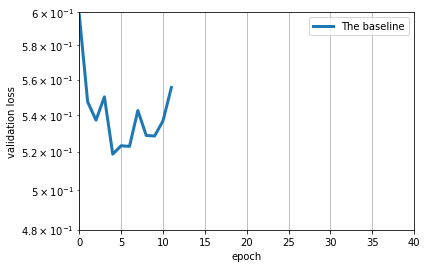

In [20]:
valid_loss1 = net1.history["val_loss"]
plt.plot(valid_loss1, linewidth=3, label="The baseline")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("validation loss")
plt.xlim(0, 40)
plt.ylim(0.48, 0.6)
plt.yscale("log")
plt.show()

Note that optimal performance is achieved around *epoch = 7*.
For later epochs the model is overfitting, and performance is worse.

# Increase dropout

Add some drop out to prevent overfitting.

In [21]:
increasedDropout = 0.4
model2 = getModel(increasedDropout)
net2 = model2.fit(X, y, epochs=12, batch_size=512, verbose=2,validation_split=0.2)

Train on 44702 samples, validate on 11176 samples
Epoch 1/12
 - 8s - loss: 1.4875 - acc: 0.6793 - val_loss: 0.6053 - val_acc: 0.7702
Epoch 2/12
 - 5s - loss: 0.6088 - acc: 0.7671 - val_loss: 0.5653 - val_acc: 0.7796
Epoch 3/12
 - 5s - loss: 0.5712 - acc: 0.7812 - val_loss: 0.5497 - val_acc: 0.7859
Epoch 4/12
 - 5s - loss: 0.5448 - acc: 0.7876 - val_loss: 0.5426 - val_acc: 0.7904
Epoch 5/12
 - 5s - loss: 0.5243 - acc: 0.7937 - val_loss: 0.5282 - val_acc: 0.7959
Epoch 6/12
 - 5s - loss: 0.5076 - acc: 0.8024 - val_loss: 0.5275 - val_acc: 0.7957
Epoch 7/12
 - 5s - loss: 0.4945 - acc: 0.8066 - val_loss: 0.5161 - val_acc: 0.7989
Epoch 8/12
 - 5s - loss: 0.4781 - acc: 0.8118 - val_loss: 0.5164 - val_acc: 0.7970
Epoch 9/12
 - 5s - loss: 0.4673 - acc: 0.8156 - val_loss: 0.5138 - val_acc: 0.7973
Epoch 10/12
 - 5s - loss: 0.4567 - acc: 0.8182 - val_loss: 0.5062 - val_acc: 0.8042
Epoch 11/12
 - 5s - loss: 0.4471 - acc: 0.8217 - val_loss: 0.5049 - val_acc: 0.8059
Epoch 12/12
 - 5s - loss: 0.4390 - 

Compare validation loss for *net1* and *net2*

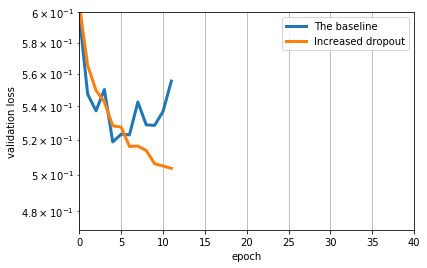

best validation loss 0.5035849450397423


In [22]:
valid_loss2 = net2.history["val_loss"]
plt.plot(valid_loss1, linewidth=3, label="The baseline")
plt.plot(valid_loss2, linewidth=3, label="Increased dropout")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("validation loss")
plt.xlim(0, 40)
plt.ylim(0.47, 0.6)
plt.yscale("log")
plt.show()
print('best validation loss', min(valid_loss2))

That is better. <br>
No more overfitting, and it feels like it is possible to increase number of epochs.

# Increase number of epochs

Increase number of epochs and check what loss can be reached.

In [23]:
model3 = getModel(increasedDropout)
net3 = model3.fit(X, y, epochs=25, batch_size=512, verbose=2, validation_split=0.2)

Train on 44702 samples, validate on 11176 samples
Epoch 1/25
 - 8s - loss: 1.4113 - acc: 0.6795 - val_loss: 0.6165 - val_acc: 0.7622
Epoch 2/25
 - 5s - loss: 0.6184 - acc: 0.7645 - val_loss: 0.5700 - val_acc: 0.7793
Epoch 3/25
 - 5s - loss: 0.5789 - acc: 0.7784 - val_loss: 0.5523 - val_acc: 0.7846
Epoch 4/25
 - 5s - loss: 0.5529 - acc: 0.7858 - val_loss: 0.5428 - val_acc: 0.7887
Epoch 5/25
 - 5s - loss: 0.5330 - acc: 0.7892 - val_loss: 0.5300 - val_acc: 0.7944
Epoch 6/25
 - 5s - loss: 0.5162 - acc: 0.7972 - val_loss: 0.5256 - val_acc: 0.7955
Epoch 7/25
 - 5s - loss: 0.5011 - acc: 0.8053 - val_loss: 0.5200 - val_acc: 0.7980
Epoch 8/25
 - 5s - loss: 0.4876 - acc: 0.8066 - val_loss: 0.5182 - val_acc: 0.7959
Epoch 9/25
 - 5s - loss: 0.4768 - acc: 0.8118 - val_loss: 0.5134 - val_acc: 0.7968
Epoch 10/25
 - 5s - loss: 0.4642 - acc: 0.8154 - val_loss: 0.5077 - val_acc: 0.8030
Epoch 11/25
 - 5s - loss: 0.4567 - acc: 0.8190 - val_loss: 0.5055 - val_acc: 0.8031
Epoch 12/25
 - 5s - loss: 0.4466 - 

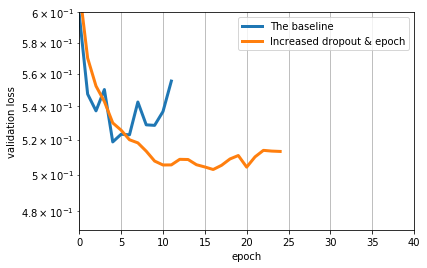

best validation loss 0.502932722046278


In [24]:
valid_loss3 = np.array(net3.history["val_loss"])
plt.plot(valid_loss1, linewidth=3, label="The baseline")
plt.plot(valid_loss3, linewidth=3, label="Increased dropout & epoch")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("validation loss")
plt.xlim(0, 40)
plt.ylim(0.47, 0.6)
plt.yscale("log")
plt.show()
print('best validation loss', min(valid_loss3))

Try to improve performance further by adding neurons

# Increase number of neurons

Increase number of neurons in the first hidden layer.

In [20]:
increasedNeurons1 = 1000
model4 = getModel(increasedDropout, neurons1=increasedNeurons1)
net4 = model4.fit(X, y, epochs=25, batch_size=512, verbose=2, validation_split=0.2)

Train on 44702 samples, validate on 11176 samples
Epoch 1/25
 - 4s - loss: 8.8414 - acc: 0.3818 - val_loss: 0.8039 - val_acc: 0.7272
Epoch 2/25
 - 3s - loss: 0.7090 - acc: 0.7383 - val_loss: 0.6051 - val_acc: 0.7685
Epoch 3/25
 - 3s - loss: 0.6136 - acc: 0.7654 - val_loss: 0.5815 - val_acc: 0.7740
Epoch 4/25
 - 3s - loss: 0.5754 - acc: 0.7759 - val_loss: 0.5565 - val_acc: 0.7866
Epoch 5/25
 - 3s - loss: 0.5426 - acc: 0.7875 - val_loss: 0.5386 - val_acc: 0.7851
Epoch 6/25
 - 3s - loss: 0.5224 - acc: 0.7973 - val_loss: 0.5298 - val_acc: 0.7925
Epoch 7/25
 - 3s - loss: 0.5055 - acc: 0.8010 - val_loss: 0.5202 - val_acc: 0.7977
Epoch 8/25
 - 4s - loss: 0.4839 - acc: 0.8066 - val_loss: 0.5217 - val_acc: 0.7921
Epoch 9/25
 - 3s - loss: 0.4723 - acc: 0.8109 - val_loss: 0.5136 - val_acc: 0.7969
Epoch 10/25
 - 4s - loss: 0.4587 - acc: 0.8156 - val_loss: 0.5025 - val_acc: 0.8047
Epoch 11/25
 - 3s - loss: 0.4482 - acc: 0.8190 - val_loss: 0.5003 - val_acc: 0.8081
Epoch 12/25
 - 3s - loss: 0.4353 - 

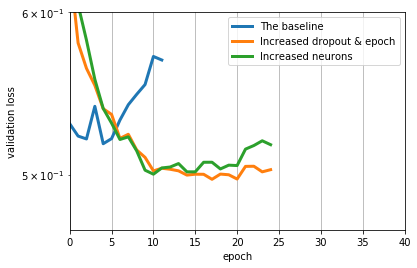

best validation loss 0.500292944371


In [21]:
valid_loss4 = net4.history["val_loss"]
plt.plot(valid_loss1, linewidth=3, label="The baseline")
plt.plot(valid_loss3, linewidth=3, label="Increased dropout & epoch")
plt.plot(valid_loss4, linewidth=3, label="Increased neurons")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("validation loss")
plt.xlim(0, 40)
plt.ylim(0.47, 0.6)
plt.yscale("log")
plt.show()
print('best validation loss', min(valid_loss4))

That is better, but we start overfitting around epoch 12. <br>

# Decrease learning rate

To prevent overfitting decrease the learning rate.

In [22]:
model5 = getModel(increasedDropout, neurons1=increasedNeurons1, learningRate=0.008)
net5 = model5.fit(X, y, epochs=30, batch_size=512, verbose=2, validation_split=0.2)

Train on 44702 samples, validate on 11176 samples
Epoch 1/30
 - 3s - loss: 0.7943 - acc: 0.7189 - val_loss: 0.6126 - val_acc: 0.7698
Epoch 2/30
 - 3s - loss: 0.6147 - acc: 0.7668 - val_loss: 0.5792 - val_acc: 0.7779
Epoch 3/30
 - 4s - loss: 0.5844 - acc: 0.7771 - val_loss: 0.5647 - val_acc: 0.7835
Epoch 4/30
 - 4s - loss: 0.5637 - acc: 0.7829 - val_loss: 0.5579 - val_acc: 0.7894
Epoch 5/30
 - 3s - loss: 0.5464 - acc: 0.7892 - val_loss: 0.5468 - val_acc: 0.7909
Epoch 6/30
 - 3s - loss: 0.5358 - acc: 0.7938 - val_loss: 0.5384 - val_acc: 0.7940
Epoch 7/30
 - 3s - loss: 0.5267 - acc: 0.7960 - val_loss: 0.5336 - val_acc: 0.7934
Epoch 8/30
 - 4s - loss: 0.5147 - acc: 0.8007 - val_loss: 0.5323 - val_acc: 0.7929
Epoch 9/30
 - 4s - loss: 0.5098 - acc: 0.8044 - val_loss: 0.5260 - val_acc: 0.7952
Epoch 10/30
 - 4s - loss: 0.5021 - acc: 0.8038 - val_loss: 0.5213 - val_acc: 0.7997
Epoch 11/30
 - 3s - loss: 0.4981 - acc: 0.8054 - val_loss: 0.5164 - val_acc: 0.8008
Epoch 12/30
 - 3s - loss: 0.4906 - 

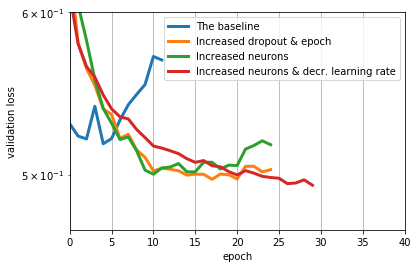

best validation loss 0.49413589042


In [23]:
valid_loss5 = net5.history["val_loss"]
plt.plot(valid_loss1, linewidth=3, label="The baseline")
plt.plot(valid_loss3, linewidth=3, label="Increased dropout & epoch")
plt.plot(valid_loss4, linewidth=3, label="Increased neurons")
plt.plot(valid_loss5, linewidth=3, label="Increased neurons & decr. learning rate")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("validation loss")
plt.xlim(0, 40)
plt.ylim(0.47, 0.6)
plt.yscale("log")
plt.show()
print('best validation loss', min(valid_loss5))

Low learning rate smoothed validation loss curve and improved prediction quality. 
Now there is a good balance between number of neurons, dropout and learning rate. <br>
Note that other parameters could have been tuned too: number of layers, activation function etc.

<font color=blue>
    
**Assignment 1**  <br>
Tune sequentially droput rate, number of epochs and number of neurons of the following network:

![test_model6](https://ilykei.com/api/fileProxy/documents%2FAdvanced%20Machine%20Learning%2FLecture%207%20AdvML%2Ftest_model6.png)

Try to improve 'best validation loss' at least by 0.02 compare to starting point (dropout rate = 0, optimizer=Adagrad(lr=0.04). <br>
Do not change validation_split=0.2, optimizer and learning rate. 

![TunningPic1](https://ilykei.com/api/fileProxy/documents%2FAdvanced%20Machine%20Learning%2FLecture%207%20AdvML%2FTunningPic1.png)

In [32]:
#Skipped code
# Assignment 1

SEED = 3
def getModel_test1(dropout=0, neurons1=500, neurons2=100, neurons3=100,
             learningRate=0.04):
    np.random.seed(0)
    model = Sequential()
    model.add(Dense(neurons1, activation='relu', input_dim=num_features,
                    kernel_initializer=glorot_uniform(seed=SEED),
                    name='Dense_1'))
    model.add(Dropout(dropout,name='Dropout_1'))
    model.add(Dense(neurons2, activation='relu',
                    kernel_initializer=glorot_uniform(seed=SEED),
                    name='Dense_2'))
    model.add(Dense(neurons3, activation='relu',
                    kernel_initializer=glorot_uniform(seed=SEED),
                    name='Dense_3'))
    model.add(Dense(num_classes, activation='softmax',
                    kernel_initializer=glorot_uniform(seed=SEED),
                    name='Output'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adagrad(lr=learningRate), metrics=['accuracy'])
    return model

model = getModel_test1()
plot_model(model, to_file='test_model6.png',show_shapes=True,
           show_layer_names=True)
net_t1 = model.fit(X, y, epochs=12, batch_size=512, verbose=1,
                  validation_split=0.2)
valid_loss_t1 = net_t1.history["val_loss"]



Train on 44702 samples, validate on 11176 samples
Epoch 1/12
44702/44702 [==============================] - 2s 42us/step - loss: 1.0187 - acc: 0.6895 - val_loss: 0.6422 - val_acc: 0.7584
Epoch 2/12
44702/44702 [==============================] - 1s 26us/step - loss: 0.5535 - acc: 0.7854 - val_loss: 0.5920 - val_acc: 0.7796
Epoch 3/12
44702/44702 [==============================] - 1s 26us/step - loss: 0.5017 - acc: 0.8032 - val_loss: 0.6048 - val_acc: 0.7682
Epoch 4/12
44702/44702 [==============================] - 1s 28us/step - loss: 0.4635 - acc: 0.8160 - val_loss: 0.5443 - val_acc: 0.7925
Epoch 5/12
44702/44702 [==============================] - 1s 29us/step - loss: 0.4263 - acc: 0.8305 - val_loss: 0.5448 - val_acc: 0.7957
Epoch 6/12
44702/44702 [==============================] - 1s 26us/step - loss: 0.3965 - acc: 0.8431 - val_loss: 0.5575 - val_acc: 0.7864
Epoch 7/12
44702/44702 [==============================] - 2s 37us/step - loss: 0.3683 - acc: 0.8531 - val_loss: 0.5522 - val_acc

In [35]:
# Assignment 1
# Skipped

increasedDropout = 0.4
model = getModel_test1(increasedDropout)
net_t2 = model.fit(X, y, epochs=22, batch_size=512, verbose=1,validation_split=0.2)
valid_loss_t2 = net_t2.history["val_loss"]

increasedNeurons = 1000
model = getModel_test1(increasedDropout,neurons1=increasedNeurons)
net_t4 = model.fit(X, y, epochs=25, batch_size=512, verbose=0,validation_split=0.2)
valid_loss_t4 = net4.history["val_loss"]



Train on 44702 samples, validate on 11176 samples
Epoch 1/22
44702/44702 [==============================] - 2s 56us/step - loss: 1.0136 - acc: 0.6863 - val_loss: 0.6414 - val_acc: 0.7552
Epoch 2/22
44702/44702 [==============================] - 2s 44us/step - loss: 0.5961 - acc: 0.7676 - val_loss: 0.5902 - val_acc: 0.7728
Epoch 3/22
44702/44702 [==============================] - 2s 40us/step - loss: 0.5529 - acc: 0.7843 - val_loss: 0.5568 - val_acc: 0.7836
Epoch 4/22
44702/44702 [==============================] - 2s 39us/step - loss: 0.5223 - acc: 0.7949 - val_loss: 0.5475 - val_acc: 0.7856
Epoch 5/22
44702/44702 [==============================] - 2s 40us/step - loss: 0.5041 - acc: 0.8027 - val_loss: 0.5259 - val_acc: 0.7958
Epoch 6/22
44702/44702 [==============================] - 2s 51us/step - loss: 0.4873 - acc: 0.8068 - val_loss: 0.5283 - val_acc: 0.7909
Epoch 7/22
44702/44702 [==============================] - 2s 40us/step - loss: 0.4708 - acc: 0.8132 - val_loss: 0.5228 - val_acc

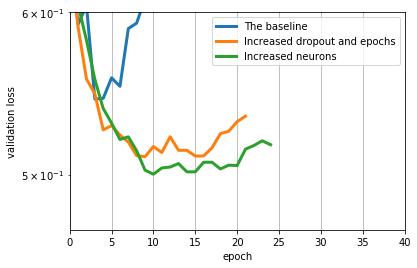

best validation loss 0.544305870255 0.510228392774 0.500292944371


In [36]:
plt.plot(valid_loss_t1, linewidth=3, label="The baseline")
plt.plot(valid_loss_t2, linewidth=3, label="Increased dropout and epochs")
plt.plot(valid_loss_t4, linewidth=3, label="Increased neurons")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("validation loss")
plt.xlim(0, 40)
plt.ylim(0.47, 0.6)
plt.yscale("log")
plt.show()
print('best validation loss', min(valid_loss_t1), min(valid_loss_t2), 
      min(valid_loss_t4))

Train on 44702 samples, validate on 11176 samples
Epoch 1/22
44702/44702 [==============================] - 3s 60us/step - loss: 1.4018 - acc: 0.6695 - val_loss: 0.6339 - val_acc: 0.7533
Epoch 2/22
44702/44702 [==============================] - 2s 43us/step - loss: 0.6068 - acc: 0.7642 - val_loss: 0.5834 - val_acc: 0.7741
Epoch 3/22
44702/44702 [==============================] - 2s 42us/step - loss: 0.5622 - acc: 0.7808 - val_loss: 0.5698 - val_acc: 0.7747
Epoch 4/22
44702/44702 [==============================] - 2s 39us/step - loss: 0.5334 - acc: 0.7903 - val_loss: 0.5364 - val_acc: 0.7904
Epoch 5/22
44702/44702 [==============================] - 2s 44us/step - loss: 0.5119 - acc: 0.7979 - val_loss: 0.5306 - val_acc: 0.7939
Epoch 6/22
44702/44702 [==============================] - 2s 42us/step - loss: 0.4948 - acc: 0.8039 - val_loss: 0.5310 - val_acc: 0.7890
Epoch 7/22
44702/44702 [==============================] - 2s 55us/step - loss: 0.4792 - acc: 0.8100 - val_loss: 0.5220 - val_acc

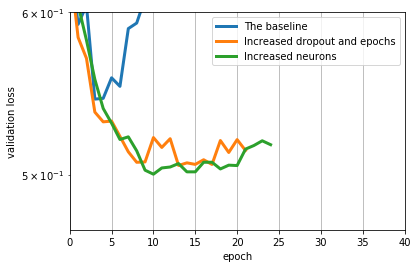

best validation loss 0.544305870255 0.505205811777 0.500292944371


In [38]:
# Assignment 1
# Skipped

increasedDropout = 0.4
model = getModel_test1(increasedDropout)
net_t2 = model.fit(X, y, epochs=22, batch_size=512, verbose=1,validation_split=0.2)
valid_loss_t2 = net_t2.history["val_loss"]

increasedNeurons = 1000
model = getModel_test1(increasedDropout,neurons1=increasedNeurons)
net_t4 = model.fit(X, y, epochs=25, batch_size=512, verbose=0,validation_split=0.2)
valid_loss_t4 = net4.history["val_loss"]

plt.plot(valid_loss_t1, linewidth=3, label="The baseline")
plt.plot(valid_loss_t2, linewidth=3, label="Increased dropout and epochs")
plt.plot(valid_loss_t4, linewidth=3, label="Increased neurons")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("validation loss")
plt.xlim(0, 40)
plt.ylim(0.47, 0.6)
plt.yscale("log")
plt.show()
print('best validation loss', min(valid_loss_t1), min(valid_loss_t2), 
      min(valid_loss_t4))

# Tuning hyperparameters with grid search

Keras sequential models (single-input only) can be used in `scikit-learn` by wrapping them with  `KerasClassifier` or `KerasRegressor` class.

To use these wrappers define a function that creates and returns Keras sequential model, then pass this function to the `build_fn` argument when constructing `KerasClassifier` class. `build_fn` should construct, compile and return a Keras model, which will then be used to fit/predict. One of the following three values could be passed to build_fn:  

- A function
- An instance of a class that implements the call method
- None. This means you implement a class that inherits from either `KerasClassifier` or `KerasRegressor`. The call method of the present class will then be treated as the default `build_fn`.

E.g. we can create `KerasClassifier` instance with the above defined function `getModel` :

In [49]:
model = KerasClassifier(build_fn=getModel)

The constructor for the KerasClassifier class takes second argument   
`ssk_params`: model parameters & fitting parameters.  
We can pass there any legal model and fitting parameters. 

In [50]:
model = KerasClassifier(build_fn=getModel, epochs=20, batch_size=512, verbose=1)
model.get_params()

{'epochs': 20,
 'batch_size': 512,
 'verbose': 1,
 'build_fn': <function __main__.getModel(dropout=0.1, neurons1=500, neurons2=250, learningRate=0.04)>}

Since it is now scikit-learn Classifier, we can use Grid search - a model hyperparameter optimization technique provided in scikit-learn GridSearchCV class.  

When constructing this class we provide a dictionary of hyperparameters to evaluate in the `param_grid` argument.

By default, the grid search will only use one thread. <br>
By setting the `n_jobs` argument in the `GridSearchCV` constructor to -1, the process will use all cores on your machine. <br>
If `n_jobs` was set to a value higher than one, the data are copied for each point in the grid (but not `n_jobs` times). <br>
This is done for efficiency if individual jobs take very little time, but may raise errors if the dataset is large and there is not enough memory available. <br>
A workaround in this case is to set `pre_dispatch`. <br>
Then, the memory is copied only `pre_dispatch` number of times. <br>
A reasonable value for `pre_dispatch` is $2~\times~$n_jobs.

The `GridSearchCV` process will then construct and evaluate one model for each combination of parameters. <br>
Cross validation is used to evaluate each individual model (by default - 3-fold cross validation, this can be overridden by specifying the `cv` argument to the `GridSearchCV` constructor).  

We set "neg_log_loss" (negative logloss) as a scoring measure since  `GridSearchCV` is trying to maximize score.

In [54]:
# define the grid search parameters
param_grid = dict(dropout=[0.2, 0.3], neurons1=[300, 500])

grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                    scoring="neg_log_loss", n_jobs=1)


Fit the model with grid search, but remember that it may take long time.

In [55]:
grid_result = grid.fit(X, y)

Epoch 1/20
37252/37252 [==============================] - 3s 70us/step - loss: 0.9546 - acc: 0.7002
Epoch 2/20
37252/37252 [==============================] - 1s 39us/step - loss: 0.5901 - acc: 0.7722
Epoch 3/20
37252/37252 [==============================] - 2s 41us/step - loss: 0.5419 - acc: 0.7905
Epoch 4/20
37252/37252 [==============================] - 2s 41us/step - loss: 0.5144 - acc: 0.8011
Epoch 5/20
37252/37252 [==============================] - 2s 43us/step - loss: 0.4903 - acc: 0.8070
Epoch 6/20
37252/37252 [==============================] - 2s 53us/step - loss: 0.4710 - acc: 0.8145
Epoch 7/20
37252/37252 [==============================] - 2s 47us/step - loss: 0.4515 - acc: 0.8233
Epoch 8/20
37252/37252 [==============================] - 2s 49us/step - loss: 0.4354 - acc: 0.8283
Epoch 9/20
37252/37252 [==============================] - 2s 42us/step - loss: 0.4189 - acc: 0.8347
Epoch 10/20
37252/37252 [==============================] - 2s 46us/step - loss: 0.4106 - acc: 0.8383

37252/37252 [==============================] - 1s 36us/step - loss: 0.4184 - acc: 0.8339
Epoch 15/20
37252/37252 [==============================] - 1s 40us/step - loss: 0.4130 - acc: 0.8353
Epoch 16/20
37252/37252 [==============================] - 2s 45us/step - loss: 0.4065 - acc: 0.8366
Epoch 17/20
37252/37252 [==============================] - 2s 45us/step - loss: 0.3975 - acc: 0.8399
Epoch 18/20
37252/37252 [==============================] - 2s 41us/step - loss: 0.3912 - acc: 0.8418
Epoch 19/20
37252/37252 [==============================] - 1s 40us/step - loss: 0.3879 - acc: 0.8444
Epoch 20/20
37252/37252 [==============================] - 0s 13us/step
Epoch 1/20
37252/37252 [==============================] - 3s 75us/step - loss: 0.9242 - acc: 0.6989
Epoch 2/20
37252/37252 [==============================] - 2s 44us/step - loss: 0.6029 - acc: 0.7681
Epoch 3/20
37252/37252 [==============================] - 2s 41us/step - loss: 0.5651 - acc: 0.7820
Epoch 4/20
37252/37252 [==========

We can extract results from `grid_result` attribute `cv_results_`. 

Recall that we were maximizing negative logloss. So, we output `-mean`  as logloss mean.

In [56]:
# summarize results
print("Best: %f using %s" % (-grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (-mean, stdev, param))


Best: 0.522755 using {'dropout': 0.3, 'neurons1': 300}
0.548724 (0.001626) with: {'dropout': 0.2, 'neurons1': 300}
0.561161 (0.026406) with: {'dropout': 0.2, 'neurons1': 500}
0.522755 (0.006321) with: {'dropout': 0.3, 'neurons1': 300}
0.529266 (0.001123) with: {'dropout': 0.3, 'neurons1': 500}


# Selecting Optimization Algorithm

Grid search may be applied not only to numerical parameters. 

We can find the best optimizer using it.

In [57]:
def getModel1(dropout=0.1, neurons1=500, neurons2=250,optimizer="Adagrad"):
    np.random.seed(1)
    model = Sequential()
    model.add(Dense(neurons1, activation='relu', input_dim=num_features))
    model.add(Dropout(dropout))
    model.add(Dense(neurons2, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer, metrics=['accuracy'])
    return model


optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# create model
model = KerasClassifier(build_fn=getModel1, dropout=0.3, neurons1=300,
                        epochs=20, batch_size=512, verbose=1)
# define the grid search parameters

grid = GridSearchCV(estimator=model, param_grid=dict(optimizer=optimizer),
                    scoring="neg_log_loss",n_jobs=1)


In [58]:
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (-grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (-mean, stdev, param))

Epoch 1/20
37252/37252 [==============================] - 3s 89us/step - loss: 1.9742 - acc: 0.3230
Epoch 2/20
37252/37252 [==============================] - 2s 53us/step - loss: 1.6486 - acc: 0.5016
Epoch 3/20
37252/37252 [==============================] - 2s 49us/step - loss: 1.4718 - acc: 0.5479
Epoch 4/20
37252/37252 [==============================] - 2s 47us/step - loss: 1.3475 - acc: 0.5787
Epoch 5/20
37252/37252 [==============================] - 2s 63us/step - loss: 1.2483 - acc: 0.6045
Epoch 6/20
37252/37252 [==============================] - 2s 44us/step - loss: 1.1773 - acc: 0.6287
Epoch 7/20
37252/37252 [==============================] - 2s 41us/step - loss: 1.1170 - acc: 0.6451
Epoch 8/20
37252/37252 [==============================] - 2s 65us/step - loss: 1.0663 - acc: 0.6614
Epoch 9/20
37252/37252 [==============================] - 3s 71us/step - loss: 1.0215 - acc: 0.6693
Epoch 10/20
37252/37252 [==============================] - 1s 40us/step - loss: 0.9852 - acc: 0.6780

37252/37252 [==============================] - 2s 42us/step - loss: 0.5104 - acc: 0.8025
Epoch 15/20
37252/37252 [==============================] - 2s 45us/step - loss: 0.5059 - acc: 0.8042
Epoch 16/20
37252/37252 [==============================] - 2s 41us/step - loss: 0.5042 - acc: 0.8039
Epoch 17/20
37252/37252 [==============================] - 1s 39us/step - loss: 0.5003 - acc: 0.8045
Epoch 18/20
37252/37252 [==============================] - 2s 42us/step - loss: 0.4957 - acc: 0.8078
Epoch 19/20
37252/37252 [==============================] - 2s 41us/step - loss: 0.4924 - acc: 0.8076
Epoch 20/20
37252/37252 [==============================] - 1s 16us/step
Epoch 1/20
37252/37252 [==============================] - 3s 89us/step - loss: 0.8054 - acc: 0.7069
Epoch 2/20
37252/37252 [==============================] - 2s 43us/step - loss: 0.6342 - acc: 0.7589
Epoch 3/20
37252/37252 [==============================] - 2s 45us/step - loss: 0.6040 - acc: 0.7688
Epoch 4/20
37252/37252 [==========

37252/37252 [==============================] - 1s 39us/step - loss: 0.5869 - acc: 0.7744
Epoch 7/20
37252/37252 [==============================] - 1s 36us/step - loss: 0.5717 - acc: 0.7803
Epoch 8/20
37252/37252 [==============================] - 1s 38us/step - loss: 0.5635 - acc: 0.7823
Epoch 9/20
37252/37252 [==============================] - 1s 39us/step - loss: 0.5520 - acc: 0.7874
Epoch 10/20
37252/37252 [==============================] - 1s 35us/step - loss: 0.5402 - acc: 0.7917
Epoch 11/20
37252/37252 [==============================] - 1s 38us/step - loss: 0.5326 - acc: 0.7956
Epoch 12/20
37252/37252 [==============================] - 1s 36us/step - loss: 0.5254 - acc: 0.7947
Epoch 13/20
37252/37252 [==============================] - 1s 39us/step - loss: 0.5205 - acc: 0.7992
Epoch 14/20
37252/37252 [==============================] - 2s 42us/step - loss: 0.5134 - acc: 0.8022
Epoch 15/20
37252/37252 [==============================] - 2s 47us/step - loss: 0.5057 - acc: 0.8055
Epoch